# Assignment 2: Linear Regression

House Price Prediction

## Importing Libraries

In [49]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import Lasso, Ridge
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv('data\Housing.csv')

In [74]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## EDA

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [76]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [77]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

### Label Encoding

In [78]:
label_encoder_obj = LabelEncoder()

In [79]:
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

In [80]:
for column in categorical_columns:
    df[column] = label_encoder_obj.fit_transform(df[column])

In [81]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


### Scaling

In [82]:
std_scaler_obj = StandardScaler()

In [83]:
df['area'] = std_scaler_obj.fit_transform(df['area'].values.reshape(-1, 1))
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,1.046726,4,2,3,1,0,0,0,1,2,1,0
1,12250000,1.757010,4,4,4,1,0,0,0,1,3,0,0
2,12250000,2.218232,3,2,2,1,0,1,0,0,2,1,1
3,12215000,1.083624,4,2,2,1,0,1,0,1,3,1,0
4,11410000,1.046726,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,-0.991879,2,1,1,1,0,1,0,0,2,0,2
541,1767150,-1.268613,3,1,1,0,0,0,0,0,0,0,1
542,1750000,-0.705921,2,1,1,1,0,0,0,0,0,0,2
543,1750000,-1.033389,3,1,1,0,0,0,0,0,0,0,0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    float64
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    int32  
 6   guestroom         545 non-null    int32  
 7   basement          545 non-null    int32  
 8   hotwaterheating   545 non-null    int32  
 9   airconditioning   545 non-null    int32  
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    int32  
 12  furnishingstatus  545 non-null    int32  
dtypes: float64(1), int32(7), int64(5)
memory usage: 40.6 KB


In [85]:
X = df.drop('price', axis=1)
y = df['price']

In [86]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.046726,4,2,3,1,0,0,0,1,2,1,0
1,1.757010,4,4,4,1,0,0,0,1,3,0,0
2,2.218232,3,2,2,1,0,1,0,0,2,1,1
3,1.083624,4,2,2,1,0,1,0,1,3,1,0
4,1.046726,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,-0.991879,2,1,1,1,0,1,0,0,2,0,2
541,-1.268613,3,1,1,0,0,0,0,0,0,0,1
542,-0.705921,2,1,1,1,0,0,0,0,0,0,2
543,-1.033389,3,1,1,0,0,0,0,0,0,0,0


In [87]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

### Train-Test Splitting

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [89]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(381, 12)
(381,)
(164, 12)
(164,)


## Linear Regression

In [90]:
lr_model = LinearRegression()

In [91]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [92]:
y_pred = lr_model.predict(X_test)

In [93]:
r2_score(y_test, y_pred)

0.7235015223200352

In [94]:
lr_model.coef_

array([ 539560.99216258,  134994.4063419 ,  950583.38011996,
        418321.56918106,  466890.75142591,  368497.64386922,
        359364.42373495, 1246653.30876347,  897037.02562919,
        223301.80933099,  696754.52500579, -230222.65347948])

In [95]:
lr_model.intercept_

1388886.23529877

## Lasso Regression

In [96]:
ridge_model = Ridge(alpha=0.01, random_state=0)

In [97]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.01, random_state=0)

In [98]:
y_pred_ridge = ridge_model.predict(X_test)

In [99]:
mean_squared_error(y_test, y_pred_ridge)

959006311108.3339

In [100]:
r2_score(y_test, y_pred_ridge)

0.7235316677421266

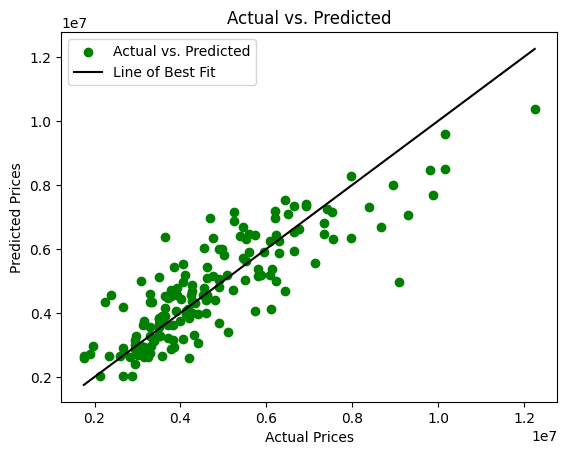

In [101]:
plt.scatter(y_test, y_pred, color='green', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', label='Line of Best Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()